<a href="https://colab.research.google.com/github/Karthikeyan-ganesan86/Mscproj/blob/main/04_DISSERT_Factors_and_Performance_Eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RISK AND RETURNS

## BASED ON VARIOUS RISK RETURN CALCULATIONS IT IS PROVEN THAT APPLE IS DOING BETTER THAN GOOGLE

In [ ]:
import yfinance as yf
import numpy as np


prices_df = yf.download(["AAPL","GOOG"], start="2023-01-01")

[*********************100%%**********************]  2 of 2 completed


In [ ]:

# convert datetime index to date format
prices_df.index = prices_df.index.date
# keep the adjust close
prices_df = prices_df['Adj Close']


In [ ]:
returns_df = prices_df.pct_change()

In [ ]:
returns_df = returns_df.dropna()

In [ ]:
deviations_df = returns_df - returns_df.mean()

In [ ]:
squared_deviations_df = deviations_df**2

In [ ]:
variance = squared_deviations_df.mean()

In [ ]:
volatility = np.sqrt(variance)

In [ ]:
num_rows = squared_deviations_df.shape[0]
variance2 = squared_deviations_df.sum() / (num_rows-1)
volatility2 = np.sqrt(variance2)
annualized_vol = returns_df.std()*np.sqrt(252)
returns_per_day = (returns_df+1).prod()**(1/returns_df.shape[0]) - 1
annualized_return = (returns_per_day+1)**252-1

In [ ]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol

In [ ]:
sharpe_ratio

AAPL    2.812445
GOOG    1.658298
dtype: float64

## TREND FOLLOWING STRATEGY

## IT CAN BE SEEN INITIALLY THAT STOCKS WERE VERY VOLATILE AND WITH IMPLEMENTATION OF TREND FOLLOWING STRATEGY THE VOLATILITY IS REDUCED

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
symbol = 'GOOG'
df = yf.download(symbol, start="2023-10-01", end="2023-10-08")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# single-period percentage returns
returns = df.Close.pct_change()


In [ ]:
# terminal return
terminal_return = df.Close[-1]/df.Close[0] - 1
terminal_return

0.0263371872961351

In [ ]:
# cumulative returns
cum_returns = (1+returns).cumprod() - 1
cum_returns

Date
2023-10-02         NaN
2023-10-03   -0.013834
2023-10-04    0.008138
2023-10-05    0.006066
2023-10-06    0.026337
Name: Close, dtype: float64

In [ ]:
# log returns (1+R format)
log_returns = np.log(1+returns)
log_returns

Date
2023-10-02         NaN
2023-10-03   -0.013931
2023-10-04    0.022036
2023-10-05   -0.002057
2023-10-06    0.019948
Name: Close, dtype: float64

In [ ]:
# get cumulative returns using log returns
cum_return2 = np.exp(log_returns.cumsum()) - 1
cum_return2

Date
2023-10-02         NaN
2023-10-03   -0.013834
2023-10-04    0.008138
2023-10-05    0.006066
2023-10-06    0.026337
Name: Close, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
symbol = 'AAPL'
df = yf.download(symbol, start="2022-01-01", end="2023-01-01")
df.index = pd.to_datetime(df.index)

[*********************100%%**********************]  1 of 1 completed


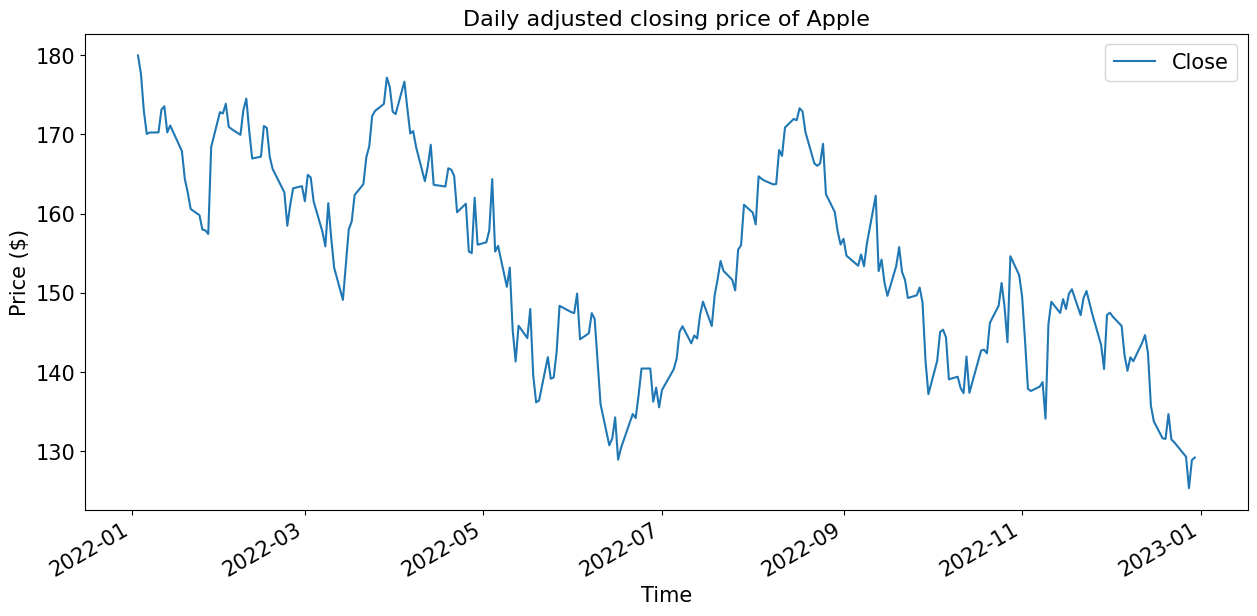

In [ ]:
# plot the adj closing price
plt.figure(figsize=(15, 7))
df['Adj Close'].plot()
# set labels and sizes of the title and axis
plt.title('Daily adjusted closing price of Apple', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})
# show the plot
plt.show()

In [ ]:
window = 3
SMA1 = "SMA-"+str(window)
df[SMA1] = df['Adj Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1]
df2 = df[colnames]
df2.head()

,Adj Close,SMA-3
Date,,
2022-01-03,179.953873,NaN
2022-01-04,177.669983,NaN
2022-01-05,172.944000,176.855952
2022-01-06,170.056961,173.556981
2022-01-07,170.225021,171.075328


In [ ]:
df['New_SMA'] = df['Adj Close'].rolling(window, min_periods=1).mean()
df[colnames + ['New_SMA']].head()

,Adj Close,SMA-3,New_SMA
Date,,,
2022-01-03,179.953873,NaN,179.953873
2022-01-04,177.669983,NaN,178.811928
2022-01-05,172.944000,176.855952,176.855952
2022-01-06,170.056961,173.556981,173.556981
2022-01-07,170.225021,171.075328,171.075328


Text(0, 0.5, 'Price')

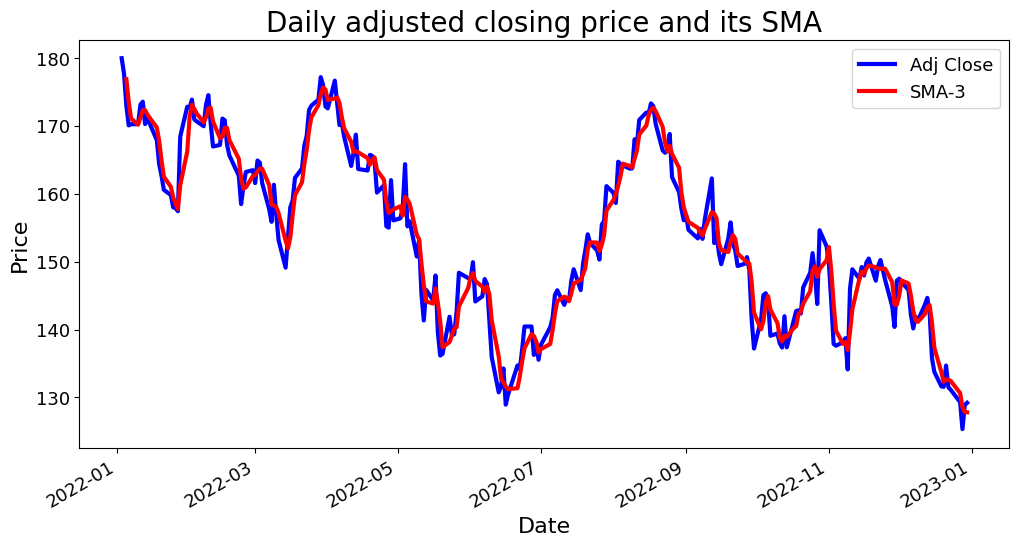

In [ ]:
# colors for the line plot
colors = ['blue', 'red']
# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)
# title and labels
plt.title('Daily adjusted closing price and its SMA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [ ]:
window = 20
SMA2 = "SMA-"+str(window)
df2[SMA2] = df2['Adj Close'].rolling(window).mean()
colnames = ["Adj Close",SMA1,SMA2]

<ipython-input-23-858174e7bd0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[SMA2] = df2['Adj Close'].rolling(window).mean()


Text(0, 0.5, 'Price')

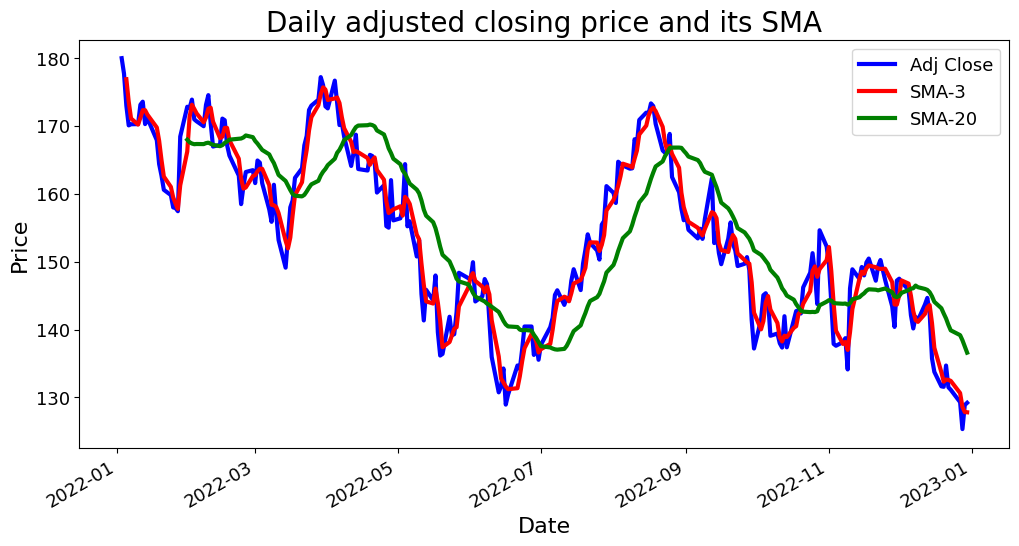

In [ ]:
# colors for the line plot
colors = ['blue', 'red', 'green']
# line plot for original price and SMA
df2.plot(color=colors, linewidth=3, figsize=(12,6))
# modify ticks size
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(labels = colnames, fontsize=13)
# title and labels
plt.title('Daily adjusted closing price and its SMA', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)

In [ ]:
alpha = 0.1


df2['EWM_'+str(alpha)] = df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()


df2.head()

<ipython-input-25-0d437f79bd23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_'+str(alpha)] = df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()


,Adj Close,SMA-3,SMA-20,EWM_0.1
Date,,,,
2022-01-03,179.953873,NaN,NaN,179.953873
2022-01-04,177.669983,NaN,NaN,179.725484
2022-01-05,172.944000,176.855952,NaN,179.047335
2022-01-06,170.056961,173.556981,NaN,178.148298
2022-01-07,170.225021,171.075328,NaN,177.355970


In [ ]:
alpha = 0.5
df2['EWM_'+str(alpha)]= df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()
df2.head()

<ipython-input-26-14e9e4830588>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['EWM_'+str(alpha)]= df2['Adj Close'].ewm(alpha=alpha, adjust=False).mean()


,Adj Close,SMA-3,SMA-20,EWM_0.1,EWM_0.5
Date,,,,,
2022-01-03,179.953873,NaN,NaN,179.953873,179.953873
2022-01-04,177.669983,NaN,NaN,179.725484,178.811928
2022-01-05,172.944000,176.855952,NaN,179.047335,175.877964
2022-01-06,170.056961,173.556981,NaN,178.148298,172.967463
2022-01-07,170.225021,171.075328,NaN,177.355970,171.596242


Text(0, 0.5, 'Price')

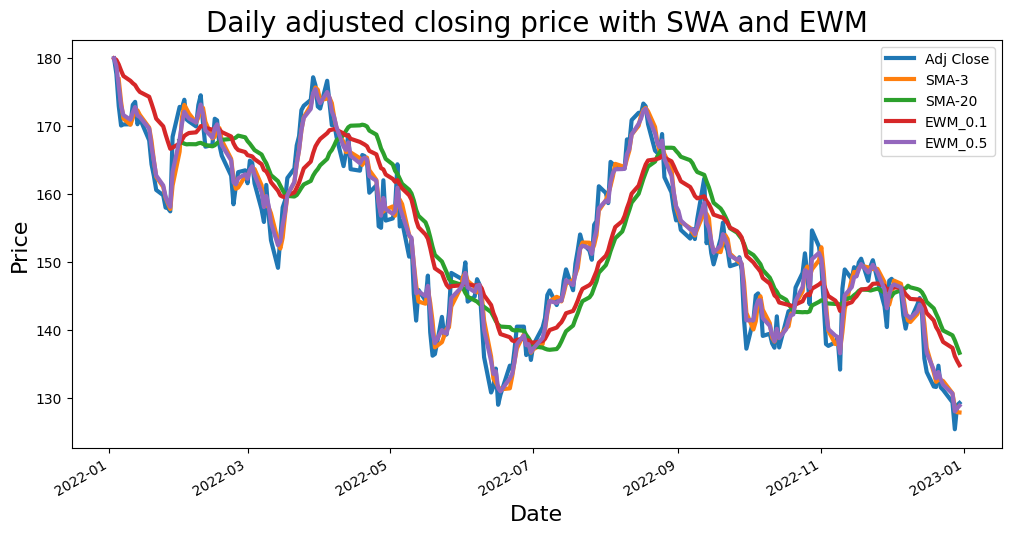

In [ ]:
df2.plot(linewidth=3, figsize=(12,6))
plt.title('Daily adjusted closing price with SWA and EWM', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-03 to 2022-12-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
 1   SMA-3      249 non-null    float64
 2   SMA-20     232 non-null    float64
 3   EWM_0.1    251 non-null    float64
 4   EWM_0.5    251 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [ ]:
df2['SMA-3'] = df2['SMA-3'].shift(1)


df2['SMA-20'] = df2['SMA-20'].shift(1)

<ipython-input-29-e7e212ce228d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-3'] = df2['SMA-3'].shift(1)
<ipython-input-29-e7e212ce228d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SMA-20'] = df2['SMA-20'].shift(1)


In [ ]:
df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-20'], 1, 0)


# identify sell signal


df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-20'], -1, df2['signal'])


df2.dropna(inplace=True)

<ipython-input-30-f3c7e20d712a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-3'] > df2['SMA-20'], 1, 0)
<ipython-input-30-f3c7e20d712a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['signal'] = np.where(df2['SMA-3'] < df2['SMA-20'], -1, df2['signal'])
<ipython-input-30-f3c7e20d712a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
 df2['signal'].value_counts()

-1    135
 1     96
Name: signal, dtype: int64

In [ ]:
df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff()

<ipython-input-32-b65d47797703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_buy_n_hold'] = np.log(df2['Adj Close']).diff()


In [ ]:
df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']

<ipython-input-33-abd431939549>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['log_return_trend_follow'] = df2['signal'] * df2['log_return_buy_n_hold']


In [ ]:
df2['action'] = df2.signal.diff()

<ipython-input-34-d307595e0b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['action'] = df2.signal.diff()


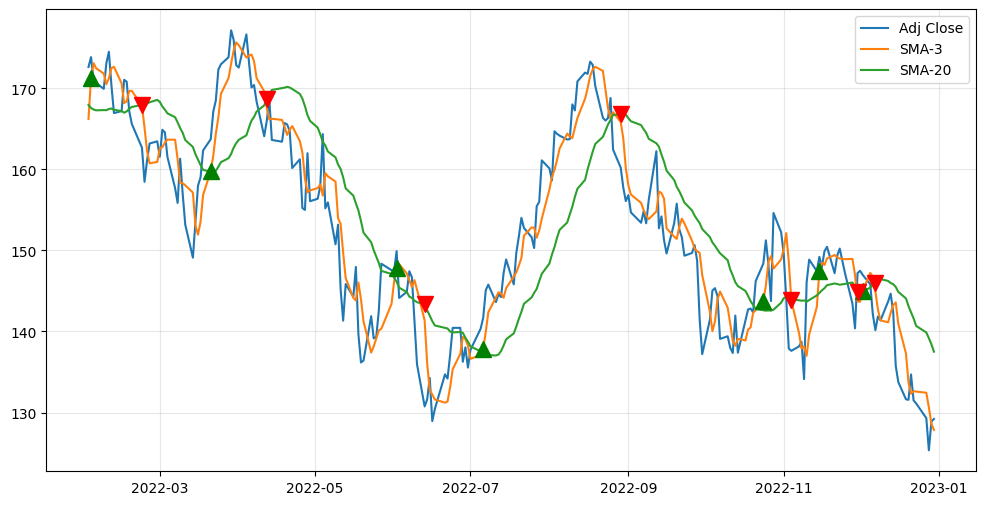

In [ ]:
plt.rcParams['figure.figsize'] = 12, 6


plt.grid(True, alpha = .3)


plt.plot(df2['Adj Close'], label = 'Adj Close')


plt.plot(df2['SMA-3'], label = 'SMA-3')


plt.plot(df2['SMA-20'], label = 'SMA-20')


plt.plot(df2.loc[df2.action == 2].index, df2['SMA-3'][df2.action == 2], '^',


         color = 'g', markersize = 12)


plt.plot(df2[df2.action == -2].index, df2['SMA-20'][df2.action == -2], 'v',


         color = 'r', markersize = 12)


plt.legend(loc=1);

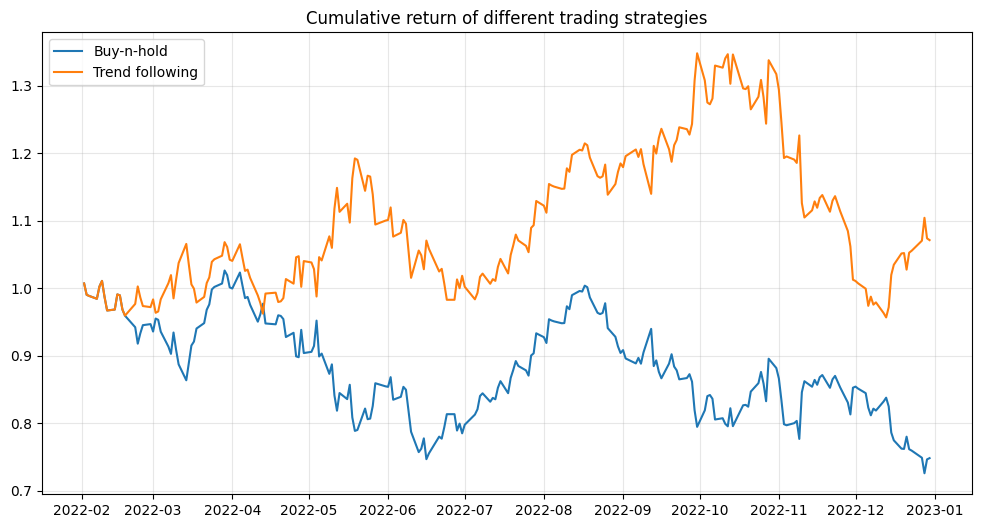

In [ ]:
plt.plot(np.exp(df2['log_return_buy_n_hold']).cumprod(), label='Buy-n-hold')


plt.plot(np.exp(df2['log_return_trend_follow']).cumprod(), label='Trend following')


plt.legend(loc=2)


plt.title("Cumulative return of different trading strategies")


plt.grid(True, alpha=.3)


In [ ]:
np.exp(df2['log_return_buy_n_hold']).cumprod()[-1] -1

-0.25156596211887094

In [ ]:
np.exp(df2['log_return_trend_follow']).cumprod()[-1] -1

0.07119428736542566

## MOMENTUM STRATEGY

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
def fetch_info():
    try:
        url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:101.0) Gecko/20100101 Firefox/101.0',
            'Accept': 'application/json',
            'Accept-Language': 'en-US,en;q=0.5',
        }
        #  Send GET request
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")
        #  Get the symbols table
        tables = soup.find_all('table')
        #  #  Convert table to dataframe
        df = pd.read_html(str(tables))[1]
        #  Cleanup
        df.drop(columns=['Notes'], inplace=True)
        return df
    except:
        print('Error loading data')
        return None

In [ ]:
# get DJI components (ticker symbols)
dji_df = fetch_info()
dji_df.head()

,Company,Exchange,Symbol,Industry,Date added,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,3.36%


In [ ]:
tickers = dji_df.Symbol.values.tolist()

In [ ]:
start_date = "2022-01-01"
end_date = "2023-09-01"
df = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  30 of 30 completed


In [ ]:
# use the adjusted closing prices for follow-up analysis
df = df['Adj Close']

In [ ]:
mth_return_df = df.pct_change().resample("M").agg(lambda x: (x+1).prod()-1)

In [ ]:
# creating a series with 9 one minute timestamps
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)

In [ ]:
series.resample('3T').sum()

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [ ]:
# obtain the historical cumulative returns of past 6 months as the terminal return of current month
past_cum_return_df = (mth_return_df+1).rolling(6).apply(np.prod) - 1

In [ ]:
import datetime as dt
end_of_measurement_period = dt.datetime(2022,6,30)
formation_period = dt.datetime(2022,7,31)

In [ ]:
end_of_measurement_period_return_df = past_cum_return_df.loc[end_of_measurement_period]


end_of_measurement_period_return_df = end_of_measurement_period_return_df.reset_index()

In [ ]:
end_of_measurement_period_return_df.head()

,index,2022-06-30 00:00:00
0,AAPL,-0.246770
1,AMGN,0.091171
2,AXP,-0.168397
3,BA,-0.342250
4,CAT,-0.128073


In [ ]:
# highest momentum in the positive direction


end_of_measurement_period_return_df.loc[end_of_measurement_period_return_df.iloc[:,1].idxmax()]


index                       CVX
2022-06-30 00:00:00    0.236824
Name: 7, dtype: object

In [ ]:
# highest momentum in the negative direction


end_of_measurement_period_return_df.loc[end_of_measurement_period_return_df.iloc[:,1].idxmin()]

index                       DIS
2022-06-30 00:00:00   -0.397806
Name: 8, dtype: object

In [ ]:
end_of_measurement_period_return_df['rank'] = pd.qcut(end_of_measurement_period_return_df.iloc[:,1], 5, labels=False)
end_of_measurement_period_return_df.head()

,index,2022-06-30 00:00:00,rank
0,AAPL,-0.246770,1
1,AMGN,0.091171,4
2,AXP,-0.168397,2
3,BA,-0.342250,0
4,CAT,-0.128073,2


In [ ]:
long_stocks = end_of_measurement_period_return_df.loc[end_of_measurement_period_return_df["rank"]==4,"index"].values


long_stocks

array(['AMGN', 'CVX', 'IBM', 'KO', 'MRK', 'TRV'], dtype=object)

In [ ]:
short_stocks = end_of_measurement_period_return_df.loc[end_of_measurement_period_return_df["rank"]==0,"index"].values


short_stocks

array(['BA', 'CRM', 'CSCO', 'DIS', 'HD', 'NKE'], dtype=object)

In [ ]:
from dateutil.relativedelta import relativedelta


long_return_df = mth_return_df.loc[formation_period +  relativedelta(months=1), mth_return_df.columns.isin(long_stocks)]

long_return_df

AMGN   -0.021474
CVX    -0.026156
IBM    -0.005517
KO     -0.038336
MRK    -0.044549
TRV     0.018526
Name: 2022-08-31 00:00:00, dtype: float64

In [ ]:
short_return_df = mth_return_df.loc[formation_period +  relativedelta(months=1),  mth_return_df.columns.isin(short_stocks)]
short_return_df

BA      0.005900
CRM    -0.151614
CSCO   -0.014327
DIS     0.056362
HD     -0.035350
NKE    -0.073703
Name: 2022-08-31 00:00:00, dtype: float64

In [ ]:
momentum_profit = long_return_df.mean() - short_return_df.mean()

In [ ]:
momentum_profit

0.01587078535880976

In [ ]:
df_dji = yf.download("^DJI", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
buy_n_hold_df = df_dji['Adj Close'].pct_change().resample("M").agg(lambda x: (x+1).prod()-1)


buy_n_hold_df.head()


Date
2022-01-31   -0.039721
2022-02-28   -0.035274
2022-03-31    0.023184
2022-04-30   -0.049055
2022-05-31    0.000391
Freq: M, Name: Adj Close, dtype: float64

In [ ]:
buy_n_hold_df.loc[formation_period + relativedelta(months=1),]

-0.04063613884907047